# Exercício 1 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9511078596115112, 1.0258035521115057e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FirstMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -1.561772  2.209993 -1.716105
1 -1.431300  1.031951  0.329130
2  0.712044 -0.264969 -0.363290
3  1.944007 -1.517365 -0.339740
4  1.046032 -1.084490  1.068878


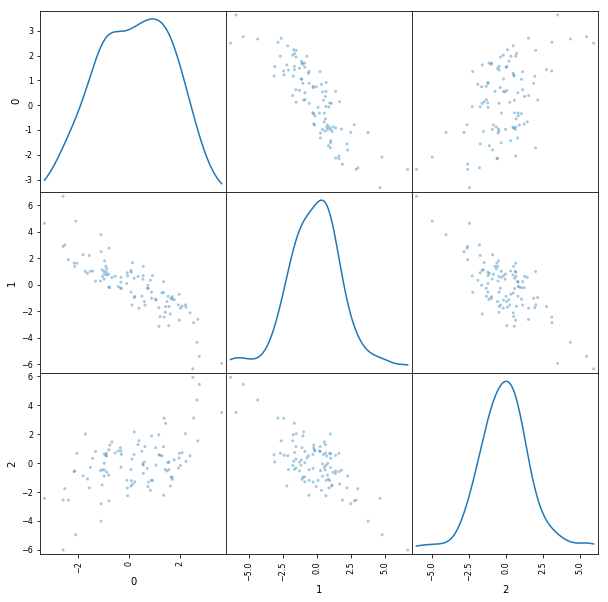

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0124,0.9857,0.35364
1,0.2707,1.2818,0.9682,0.016161
2,0.3736,0.5026,0.9614,0.0050693


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 20)

Execution time: 0.18002867698669434 seconds


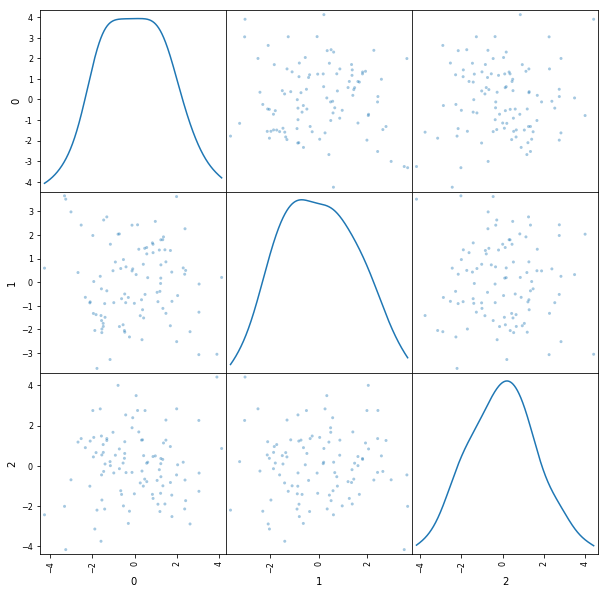

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1189,0.9925,0.85302
1,0,0.1841,0.9865,0.40462
2,0,0.2253,0.9949,0.97317


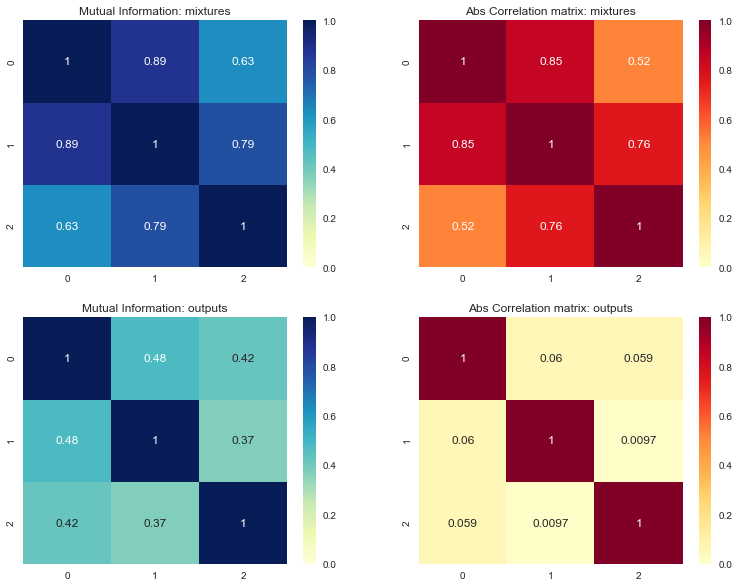

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1000) 

Execution time: 9.473157405853271 seconds


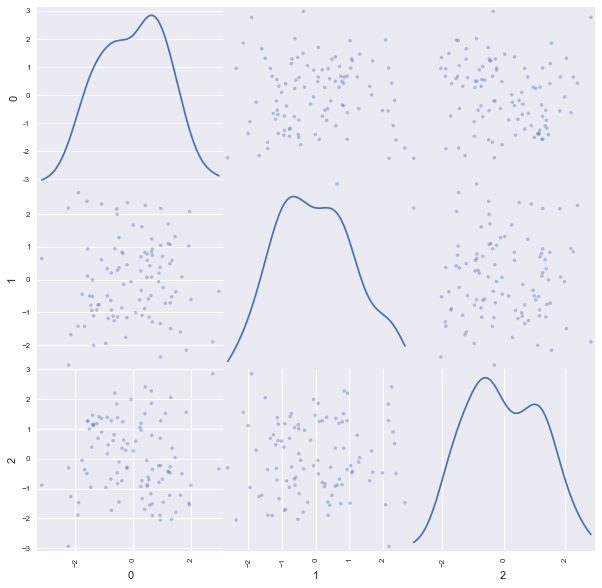

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1108,0.9882,0.52047
1,0,0.227,0.9815,0.17236
2,0,0.3754,0.9792,0.11569


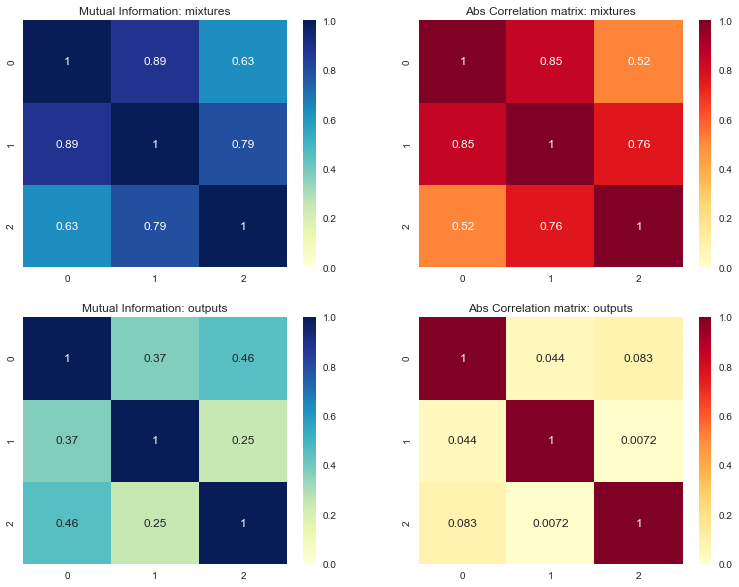

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-8, runs = 20)

Execution time: 0.16202425956726074 seconds


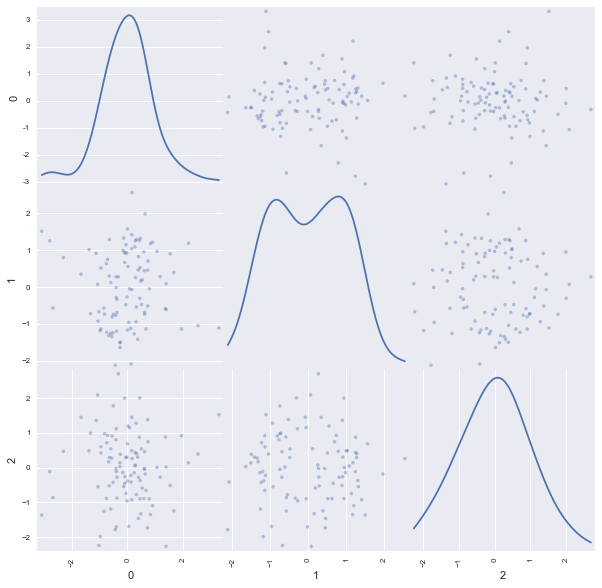

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1743,0.2288,0.9613,0.00496
1,0,0.0719,0.9689,0.018293
2,0.0427,0.0952,0.9952,0.98028


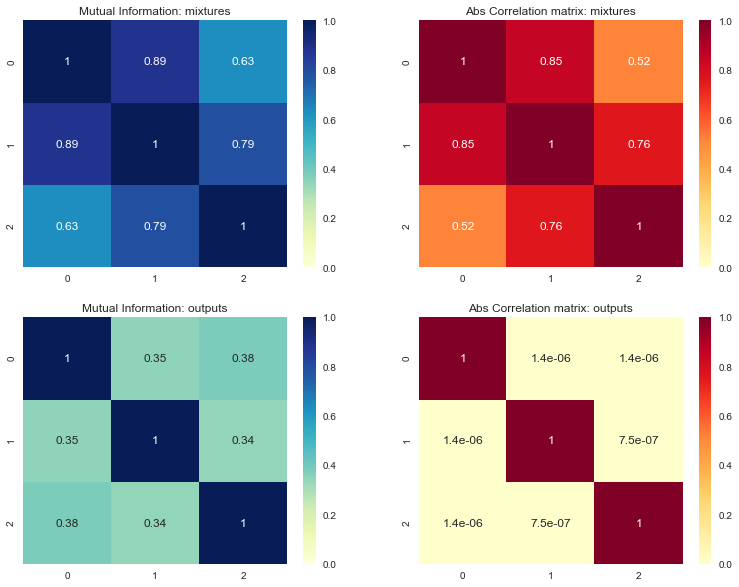

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)